# Анализ покупок музыкальных треков

In [1]:
# Задача:
# Анализируем покупки музыкальных треков разных жанров

In [2]:
# импорт библиотек

import sqlite3
import pandas as pd
import seaborn as sns
import re
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# установим соединение с базой

dbfile = "chinook.db"
conn = sqlite3.connect(dbfile) # 
cursor = conn.cursor() # необходимо установить курсор от соответствующего соединения

cursor.execute("SELECT name FROM sqlite_master WHERE type='table';") 
print(f"Table Name : {cursor.fetchall()}")

Table Name : [('album',), ('artist',), ('customer',), ('employee',), ('genre',), ('invoice',), ('invoice_line',), ('media_type',), ('playlist',), ('playlist_track',), ('track',)]


In [4]:
# в таблицу должны попасть данные только по аудиофайлам (нужно проверить media_type)

result = [a for a in cursor.execute("SELECT name, media_type_id FROM media_type")]
print(result)

[('MPEG audio file', 1), ('Protected AAC audio file', 2), ('Protected MPEG-4 video file', 3), ('Purchased AAC audio file', 4), ('AAC audio file', 5)]


In [5]:
# аудиофайлы это 1, 2, 4, 5

In [6]:
# жанры

result = [a for a in cursor.execute("SELECT name, genre_id FROM genre")]
print(result)

[('Rock', 1), ('Jazz', 2), ('Metal', 3), ('Alternative & Punk', 4), ('Rock And Roll', 5), ('Blues', 6), ('Latin', 7), ('Reggae', 8), ('Pop', 9), ('Soundtrack', 10), ('Bossa Nova', 11), ('Easy Listening', 12), ('Heavy Metal', 13), ('R&B/Soul', 14), ('Electronica/Dance', 15), ('World', 16), ('Hip Hop/Rap', 17), ('Science Fiction', 18), ('TV Shows', 19), ('Sci Fi & Fantasy', 20), ('Drama', 21), ('Comedy', 22), ('Alternative', 23), ('Classical', 24), ('Opera', 25)]


In [7]:
result = [a for a in cursor.execute("SELECT customer_id, a.invoice_id, invoice_date, a.track_id, unit_price, Media_Type_Id, Genre_Id \
                                     FROM \
                                      (SELECT customer_id, a.invoice_id, invoice_date, track_id, unit_price \
                                        FROM \
                                        (SELECT customer_id, invoice_id, invoice_date \
                                         FROM invoice \
                                         WHERE invoice_date LIKE '2020-%') AS a \
                                      JOIN \
                                      (SELECT invoice_id, track_id, unit_price \
                                           FROM invoice_line) AS b \
                                      ON a.invoice_id = b.invoice_id) AS a \
                                      JOIN \
                                        (SELECT Media_Type_Id, track_id, Genre_Id \
                                         FROM track) AS b \
                                      ON a.track_id = b.track_id ")]


print(len(result))

1150


In [9]:
for i, row in enumerate(result):
    if i >= 20:
        break
    print(row)


(21, 465, '2020-01-12 00:00:00', 149, 0.99, 1, 3)
(21, 465, '2020-01-12 00:00:00', 150, 0.99, 1, 3)
(21, 465, '2020-01-12 00:00:00', 151, 0.99, 1, 3)
(21, 465, '2020-01-12 00:00:00', 152, 0.99, 1, 3)
(21, 465, '2020-01-12 00:00:00', 153, 0.99, 1, 3)
(21, 465, '2020-01-12 00:00:00', 154, 0.99, 1, 3)
(21, 465, '2020-01-12 00:00:00', 155, 0.99, 1, 3)
(30, 466, '2020-01-19 00:00:00', 428, 0.99, 1, 1)
(30, 466, '2020-01-19 00:00:00', 2379, 0.99, 1, 1)
(30, 466, '2020-01-19 00:00:00', 73, 0.99, 1, 2)
(30, 466, '2020-01-19 00:00:00', 2634, 0.99, 1, 1)
(5, 467, '2020-01-20 00:00:00', 3424, 0.99, 2, 24)
(5, 467, '2020-01-20 00:00:00', 1789, 0.99, 1, 14)
(5, 467, '2020-01-20 00:00:00', 2262, 0.99, 1, 1)
(5, 467, '2020-01-20 00:00:00', 1802, 0.99, 1, 3)
(5, 467, '2020-01-20 00:00:00', 2012, 0.99, 1, 1)
(5, 467, '2020-01-20 00:00:00', 154, 0.99, 1, 3)
(5, 467, '2020-01-20 00:00:00', 1956, 0.99, 1, 3)
(5, 467, '2020-01-20 00:00:00', 3128, 0.99, 1, 7)
(5, 467, '2020-01-20 00:00:00', 207, 0.99, 1, 7)

In [10]:
# проверяем, что тип медиа не 3 и добавляем жанр

In [11]:
result = [a for a in cursor.execute("SELECT customer_id, a.invoice_id, invoice_date, a.track_id, unit_price, GenreName \
                                     FROM \
                                     (SELECT customer_id, a.invoice_id, invoice_date, a.track_id, unit_price, Media_Type_Id, Genre_Id \
                                      FROM \
                                      (SELECT customer_id, a.invoice_id, invoice_date, track_id, unit_price \
                                        FROM \
                                        (SELECT customer_id, invoice_id, invoice_date \
                                         FROM invoice \
                                         WHERE invoice_date LIKE '2020-%') AS a \
                                      JOIN \
                                      (SELECT invoice_id, track_id, unit_price \
                                           FROM invoice_line) AS b \
                                      ON a.invoice_id = b.invoice_id) AS a \
                                      JOIN \
                                        (SELECT Media_Type_Id, track_id, Genre_Id \
                                         FROM track \
                                         WHERE Media_Type_Id <> 3) AS b \
                                      ON a.track_id = b.track_id) AS a \
                                      JOIN \
                                      (SELECT Genre_Id, Name as GenreName \
                                      FROM genre) AS b \
                                      ON a.Genre_Id = b.Genre_Id")]


print(len(result))

1150


In [13]:
for i, row in enumerate(result):
    if i >= 20:
        break
    print(row)

(21, 465, '2020-01-12 00:00:00', 149, 0.99, 'Metal')
(21, 465, '2020-01-12 00:00:00', 150, 0.99, 'Metal')
(21, 465, '2020-01-12 00:00:00', 151, 0.99, 'Metal')
(21, 465, '2020-01-12 00:00:00', 152, 0.99, 'Metal')
(21, 465, '2020-01-12 00:00:00', 153, 0.99, 'Metal')
(21, 465, '2020-01-12 00:00:00', 154, 0.99, 'Metal')
(21, 465, '2020-01-12 00:00:00', 155, 0.99, 'Metal')
(30, 466, '2020-01-19 00:00:00', 428, 0.99, 'Rock')
(30, 466, '2020-01-19 00:00:00', 2379, 0.99, 'Rock')
(30, 466, '2020-01-19 00:00:00', 73, 0.99, 'Jazz')
(30, 466, '2020-01-19 00:00:00', 2634, 0.99, 'Rock')
(5, 467, '2020-01-20 00:00:00', 3424, 0.99, 'Classical')
(5, 467, '2020-01-20 00:00:00', 1789, 0.99, 'R&B/Soul')
(5, 467, '2020-01-20 00:00:00', 2262, 0.99, 'Rock')
(5, 467, '2020-01-20 00:00:00', 1802, 0.99, 'Metal')
(5, 467, '2020-01-20 00:00:00', 2012, 0.99, 'Rock')
(5, 467, '2020-01-20 00:00:00', 154, 0.99, 'Metal')
(5, 467, '2020-01-20 00:00:00', 1956, 0.99, 'Metal')
(5, 467, '2020-01-20 00:00:00', 3128, 0.99, '

In [14]:
# жанр каждого трека: объединим все тяжёлые жанры (Rock, Alternative & Punk, Metal, Alternative, Heavy Metal) 
# в категорию ‘rock’, а остальные жанры — в категорию ‘others’;

In [15]:
result = [a for a in cursor.execute("SELECT customer_id, a.invoice_id, invoice_date, a.track_id, unit_price, GenreName, \
                                     CASE WHEN GenreName IN ('Rock', 'Alternative & Punk', 'Metal', 'Alternative', 'Heavy Metal') THEN 'rock' ELSE 'others' END AS category \
                                     FROM \
                                     (SELECT customer_id, a.invoice_id, invoice_date, a.track_id, unit_price, Media_Type_Id, Genre_Id \
                                      FROM \
                                      (SELECT customer_id, a.invoice_id, invoice_date, track_id, unit_price \
                                        FROM \
                                        (SELECT customer_id, invoice_id, invoice_date \
                                         FROM invoice \
                                         WHERE invoice_date LIKE '2020-%') AS a \
                                      JOIN \
                                      (SELECT invoice_id, track_id, unit_price \
                                           FROM invoice_line) AS b \
                                      ON a.invoice_id = b.invoice_id) AS a \
                                      JOIN \
                                        (SELECT Media_Type_Id, track_id, Genre_Id \
                                         FROM track \
                                         WHERE Media_Type_Id <> 3) AS b \
                                      ON a.track_id = b.track_id) AS a \
                                      JOIN \
                                      (SELECT Genre_Id, Name as GenreName \
                                      FROM genre) AS b \
                                      ON a.Genre_Id = b.Genre_Id")]



print(len(result))

1150


In [16]:
for i, row in enumerate(result):
    if i >= 20:
        break
    print(row)

(21, 465, '2020-01-12 00:00:00', 149, 0.99, 'Metal', 'rock')
(21, 465, '2020-01-12 00:00:00', 150, 0.99, 'Metal', 'rock')
(21, 465, '2020-01-12 00:00:00', 151, 0.99, 'Metal', 'rock')
(21, 465, '2020-01-12 00:00:00', 152, 0.99, 'Metal', 'rock')
(21, 465, '2020-01-12 00:00:00', 153, 0.99, 'Metal', 'rock')
(21, 465, '2020-01-12 00:00:00', 154, 0.99, 'Metal', 'rock')
(21, 465, '2020-01-12 00:00:00', 155, 0.99, 'Metal', 'rock')
(30, 466, '2020-01-19 00:00:00', 428, 0.99, 'Rock', 'rock')
(30, 466, '2020-01-19 00:00:00', 2379, 0.99, 'Rock', 'rock')
(30, 466, '2020-01-19 00:00:00', 73, 0.99, 'Jazz', 'others')
(30, 466, '2020-01-19 00:00:00', 2634, 0.99, 'Rock', 'rock')
(5, 467, '2020-01-20 00:00:00', 3424, 0.99, 'Classical', 'others')
(5, 467, '2020-01-20 00:00:00', 1789, 0.99, 'R&B/Soul', 'others')
(5, 467, '2020-01-20 00:00:00', 2262, 0.99, 'Rock', 'rock')
(5, 467, '2020-01-20 00:00:00', 1802, 0.99, 'Metal', 'rock')
(5, 467, '2020-01-20 00:00:00', 2012, 0.99, 'Rock', 'rock')
(5, 467, '2020-0

In [17]:
# на основе запроса создаем итоговый DataFrame

In [18]:
df = pd.read_sql_query("SELECT customer_id, a.invoice_id, invoice_date, a.track_id, unit_price, GenreName, \
                                     CASE WHEN GenreName IN ('Rock', 'Alternative & Punk', 'Metal', 'Alternative', 'Heavy Metal') THEN 'rock' ELSE 'others' END AS category \
                                     FROM \
                                     (SELECT customer_id, a.invoice_id, invoice_date, a.track_id, unit_price, Media_Type_Id, Genre_Id \
                                      FROM \
                                      (SELECT customer_id, a.invoice_id, invoice_date, track_id, unit_price \
                                        FROM \
                                        (SELECT customer_id, invoice_id, invoice_date \
                                         FROM invoice \
                                         WHERE invoice_date LIKE '2020-%') AS a \
                                      JOIN \
                                      (SELECT invoice_id, track_id, unit_price \
                                           FROM invoice_line) AS b \
                                      ON a.invoice_id = b.invoice_id) AS a \
                                      JOIN \
                                        (SELECT Media_Type_Id, track_id, Genre_Id \
                                         FROM track \
                                         WHERE Media_Type_Id <> 3) AS b \
                                      ON a.track_id = b.track_id) AS a \
                                      JOIN \
                                      (SELECT Genre_Id, Name as GenreName \
                                      FROM genre) AS b \
                                      ON a.Genre_Id = b.Genre_Id", conn)



In [19]:
df

,customer_id,invoice_id,invoice_date,track_id,unit_price,GenreName,category
0,21,465,2020-01-12 00:00:00,149,0.99,Metal,rock
1,21,465,2020-01-12 00:00:00,150,0.99,Metal,rock
2,21,465,2020-01-12 00:00:00,151,0.99,Metal,rock
3,21,465,2020-01-12 00:00:00,152,0.99,Metal,rock
4,21,465,2020-01-12 00:00:00,153,0.99,Metal,rock
...,...,...,...,...,...,...,...
1145,53,614,2020-12-30 00:00:00,2659,0.99,Rock,rock
1146,53,614,2020-12-30 00:00:00,2660,0.99,Rock,rock
1147,53,614,2020-12-30 00:00:00,2661,0.99,Rock,rock
1148,53,614,2020-12-30 00:00:00,2662,0.99,Rock,rock


In [20]:
# пропусков нет

df.isna().sum()

customer_id     0
invoice_id      0
invoice_date    0
track_id        0
unit_price      0
GenreName       0
category        0
dtype: int64

<Axes: >

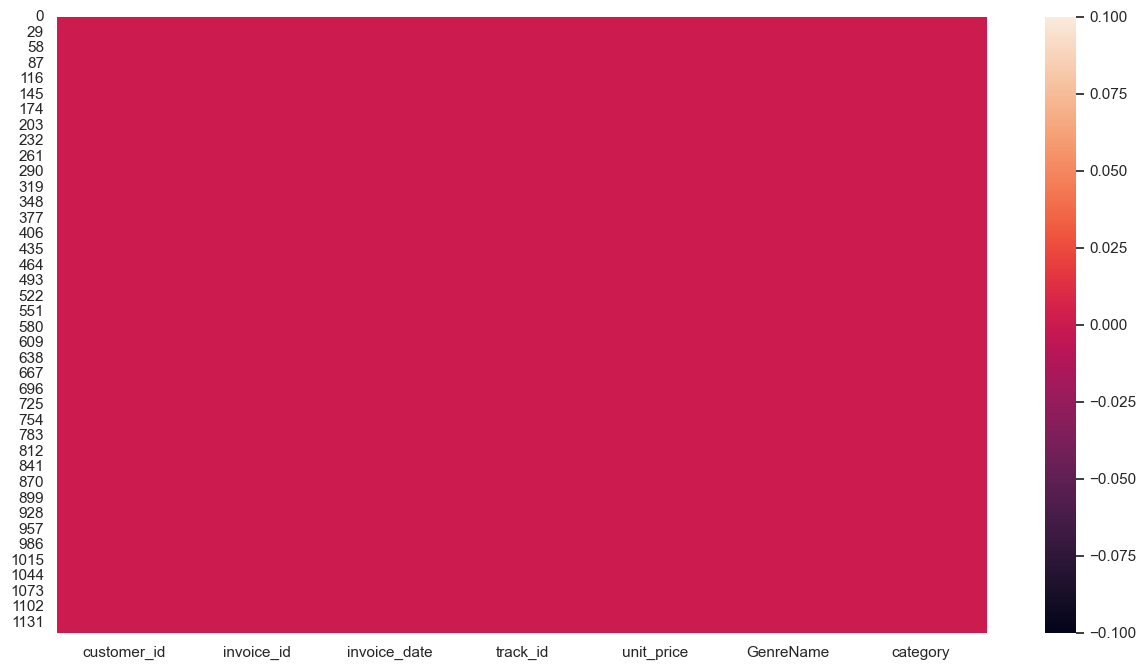

In [21]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(df.isnull())

In [22]:
# приведем дату к первому числу каждого месяца (2020-01-01, 2020-02-01 и так далее)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   1150 non-null   int64  
 1   invoice_id    1150 non-null   int64  
 2   invoice_date  1150 non-null   object 
 3   track_id      1150 non-null   int64  
 4   unit_price    1150 non-null   float64
 5   GenreName     1150 non-null   object 
 6   category      1150 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 63.0+ KB


In [24]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], utc=True)

In [25]:
df['invoice_date']

0      2020-01-12 00:00:00+00:00
1      2020-01-12 00:00:00+00:00
2      2020-01-12 00:00:00+00:00
3      2020-01-12 00:00:00+00:00
4      2020-01-12 00:00:00+00:00
                  ...           
1145   2020-12-30 00:00:00+00:00
1146   2020-12-30 00:00:00+00:00
1147   2020-12-30 00:00:00+00:00
1148   2020-12-30 00:00:00+00:00
1149   2020-12-30 00:00:00+00:00
Name: invoice_date, Length: 1150, dtype: datetime64[ns, UTC]

In [26]:
df['invoice_date'] = df['invoice_date'].apply(lambda x: x.replace(day=1)) 
df['invoice_date']

0      2020-01-01 00:00:00+00:00
1      2020-01-01 00:00:00+00:00
2      2020-01-01 00:00:00+00:00
3      2020-01-01 00:00:00+00:00
4      2020-01-01 00:00:00+00:00
                  ...           
1145   2020-12-01 00:00:00+00:00
1146   2020-12-01 00:00:00+00:00
1147   2020-12-01 00:00:00+00:00
1148   2020-12-01 00:00:00+00:00
1149   2020-12-01 00:00:00+00:00
Name: invoice_date, Length: 1150, dtype: datetime64[ns, UTC]

In [31]:
df['invoice_date'].tolist()[0:10]

[Timestamp('2020-01-01 00:00:00+0000', tz='UTC'),
 Timestamp('2020-01-01 00:00:00+0000', tz='UTC'),
 Timestamp('2020-01-01 00:00:00+0000', tz='UTC'),
 Timestamp('2020-01-01 00:00:00+0000', tz='UTC'),
 Timestamp('2020-01-01 00:00:00+0000', tz='UTC'),
 Timestamp('2020-01-01 00:00:00+0000', tz='UTC'),
 Timestamp('2020-01-01 00:00:00+0000', tz='UTC'),
 Timestamp('2020-01-01 00:00:00+0000', tz='UTC'),
 Timestamp('2020-01-01 00:00:00+0000', tz='UTC'),
 Timestamp('2020-01-01 00:00:00+0000', tz='UTC')]

In [32]:
df.head(10)

,customer_id,invoice_id,invoice_date,track_id,unit_price,GenreName,category
0,21,465,2020-01-01 00:00:00+00:00,149,0.99,Metal,rock
1,21,465,2020-01-01 00:00:00+00:00,150,0.99,Metal,rock
2,21,465,2020-01-01 00:00:00+00:00,151,0.99,Metal,rock
3,21,465,2020-01-01 00:00:00+00:00,152,0.99,Metal,rock
4,21,465,2020-01-01 00:00:00+00:00,153,0.99,Metal,rock
5,21,465,2020-01-01 00:00:00+00:00,154,0.99,Metal,rock
6,21,465,2020-01-01 00:00:00+00:00,155,0.99,Metal,rock
7,30,466,2020-01-01 00:00:00+00:00,428,0.99,Rock,rock
8,30,466,2020-01-01 00:00:00+00:00,2379,0.99,Rock,rock
9,30,466,2020-01-01 00:00:00+00:00,73,0.99,Jazz,others


In [33]:
df.shape

(1150, 7)

In [34]:
df['invoice_date'] = df['invoice_date'].apply(lambda x: x.strftime('%Y-%m'))
df['invoice_date']

0       2020-01
1       2020-01
2       2020-01
3       2020-01
4       2020-01
         ...   
1145    2020-12
1146    2020-12
1147    2020-12
1148    2020-12
1149    2020-12
Name: invoice_date, Length: 1150, dtype: object

In [35]:
df.head(3)

,customer_id,invoice_id,invoice_date,track_id,unit_price,GenreName,category
0,21,465,2020-01,149,0.99,Metal,rock
1,21,465,2020-01,150,0.99,Metal,rock
2,21,465,2020-01,151,0.99,Metal,rock


In [36]:
# сгруппируем данные и с помощью библиотеки seaborn построим графики, чтобы оценить по категориям жанров (‘rock’ и ‘others’) 
# следующие ежемесячные показатели:

In [37]:
# общее количество купленных треков

data_track_count = df.groupby(['invoice_date', 'category'], as_index=False).agg(track_count=('track_id', 'count'))
data_track_count

,invoice_date,category,track_count
0,2020-01,others,6
1,2020-01,rock,38
2,2020-02,others,5
3,2020-02,rock,93
4,2020-03,others,21
5,2020-03,rock,58
6,2020-04,others,15
7,2020-04,rock,106
8,2020-05,others,17
9,2020-05,rock,66


In [38]:
data_track_count['track_count'].sum()

1150

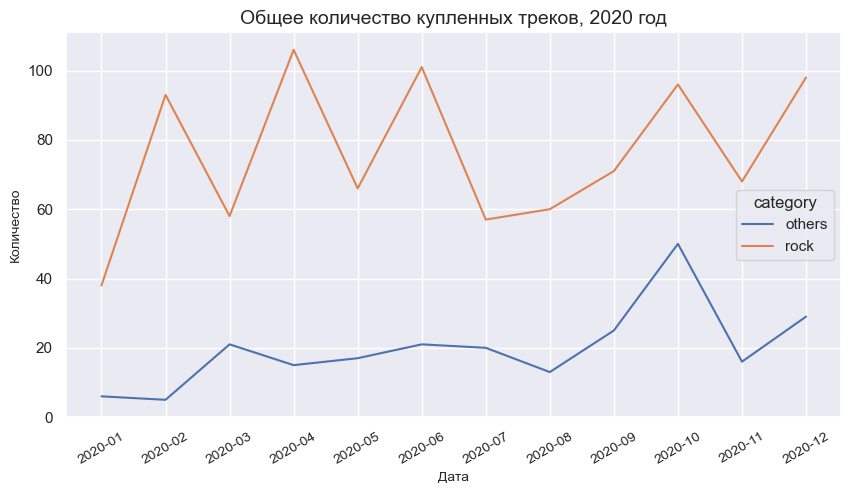

In [39]:
plt.figure(figsize=(10,5))
sns.lineplot(x='invoice_date', y='track_count', data=data_track_count, hue='category')
plt.title('Общее количество купленных треков, 2020 год', fontsize=14)
plt.xticks(fontsize=10, rotation=30)
plt.xlabel('Дата', fontsize=10)
plt.ylabel('Количество', fontsize=10)
plt.show()

In [40]:
# количество купленных треков имеет сезонность 
# по Rock наблюдается увеличение покупок в феврале, апреле, июне, октябре и декабре, Rock на спаде в марте, мае, летом и в ноябре
# по Others малый подъем в марте и подъем в октябре

# покупки Rock значительно превышают покупки Others на всём отрезке 2020 года

In [41]:
df[:4]

,customer_id,invoice_id,invoice_date,track_id,unit_price,GenreName,category
0,21,465,2020-01,149,0.99,Metal,rock
1,21,465,2020-01,150,0.99,Metal,rock
2,21,465,2020-01,151,0.99,Metal,rock
3,21,465,2020-01,152,0.99,Metal,rock


In [42]:
# число чеков:

# группировкой найдем уникальные чеки в каждой категории

data_invoice_count = df.groupby(['invoice_date', 'category', 'invoice_id'], as_index=False).agg(invoice_count=('invoice_id', 'count'))
data_invoice_count


,invoice_date,category,invoice_id,invoice_count
0,2020-01,others,466,1
1,2020-01,others,467,4
2,2020-01,others,472,1
3,2020-01,rock,465,7
4,2020-01,rock,466,3
...,...,...,...,...
219,2020-12,rock,610,5
220,2020-12,rock,611,2
221,2020-12,rock,612,12
222,2020-12,rock,613,7


In [43]:
data_invoice_count['invoice_count'].sum()

1150

In [44]:
# посчитаем уникальные чеки в каждой категории

data_invoice_count_2 = data_invoice_count.groupby(['invoice_date', 'category'], as_index=False).agg(invoice_count_unique=('invoice_id', 'count'))
data_invoice_count_2

,invoice_date,category,invoice_count_unique
0,2020-01,others,3
1,2020-01,rock,8
2,2020-02,others,4
3,2020-02,rock,11
4,2020-03,others,6
5,2020-03,rock,10
6,2020-04,others,8
7,2020-04,rock,15
8,2020-05,others,8
9,2020-05,rock,13


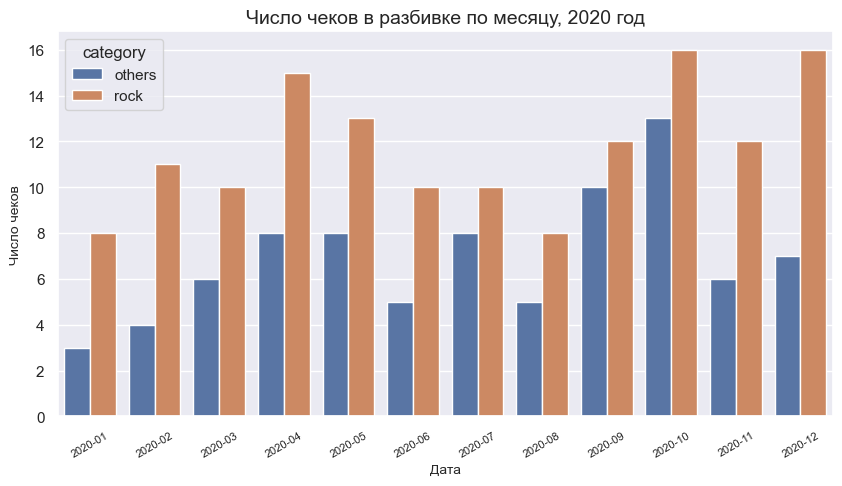

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(x='invoice_date', y='invoice_count_unique', data = data_invoice_count_2, hue='category')
plt.title('Число чеков в разбивке по месяцу, 2020 год', fontsize=14)
plt.xticks(fontsize=8 ,rotation=30)
# Название оси X
plt.xlabel('Дата', fontsize=10)
# Название оси X
plt.ylabel('Число чеков', fontsize=10)
plt.show()

In [46]:
# по Rock увеличение в апреле, октябре и декабре
# по Others увеличение в сентябре, октябре 

# покупки Rock значительно превышают покупки Others на всём отрезке 2020 года

In [47]:
# число покупателей:

# группировкой найдем уникальных покупателей в каждой категории

data_customer_count = df.groupby(['invoice_date', 'category', 'customer_id'], as_index=False).agg(customer_count=('customer_id', 'count'))
data_customer_count

,invoice_date,category,customer_id,customer_count
0,2020-01,others,5,4
1,2020-01,others,7,1
2,2020-01,others,30,1
3,2020-01,rock,5,6
4,2020-01,rock,7,2
...,...,...,...,...
205,2020-12,rock,49,1
206,2020-12,rock,52,2
207,2020-12,rock,53,13
208,2020-12,rock,55,5


In [48]:
data_customer_count['customer_count'].sum()

1150

In [49]:
# посчитаем уникальных покупателей в каждой категории

data_customer_count_2 = data_customer_count.groupby(['invoice_date', 'category'], as_index=False).agg(customer_count_unique=('customer_id', 'count'))
data_customer_count_2

,invoice_date,category,customer_count_unique
0,2020-01,others,3
1,2020-01,rock,8
2,2020-02,others,4
3,2020-02,rock,11
4,2020-03,others,6
5,2020-03,rock,10
6,2020-04,others,8
7,2020-04,rock,15
8,2020-05,others,7
9,2020-05,rock,11


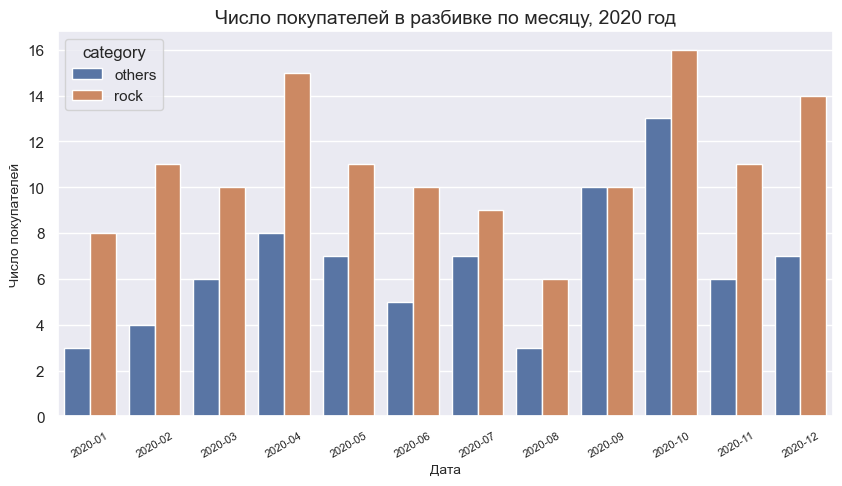

In [50]:
plt.figure(figsize=(10,5))
sns.barplot(x='invoice_date', y='customer_count_unique', data = data_customer_count_2, hue='category')
plt.title('Число покупателей в разбивке по месяцу, 2020 год', fontsize=14)
plt.xticks(fontsize=8 ,rotation=30)
# Название оси X
plt.xlabel('Дата', fontsize=10)
# Название оси X
plt.ylabel('Число покупателей', fontsize=10)
plt.show()

In [51]:
# число покупателей по Rock преобладает в апреле, октябре и декабре
# число покупателей по Others преобладает в апреле, сентябре и октябре(самый высокий показатель)

In [52]:
# общая стоимость треков:

data_track_sum = df.groupby(['invoice_date', 'category'], as_index=False).agg(track_sum=('unit_price', 'sum'))
data_track_sum

,invoice_date,category,track_sum
0,2020-01,others,5.94
1,2020-01,rock,37.62
2,2020-02,others,4.95
3,2020-02,rock,92.07
4,2020-03,others,20.79
5,2020-03,rock,57.42
6,2020-04,others,14.85
7,2020-04,rock,104.94
8,2020-05,others,16.83
9,2020-05,rock,65.34


In [53]:
data_track_sum['track_sum'].sum()

1138.5

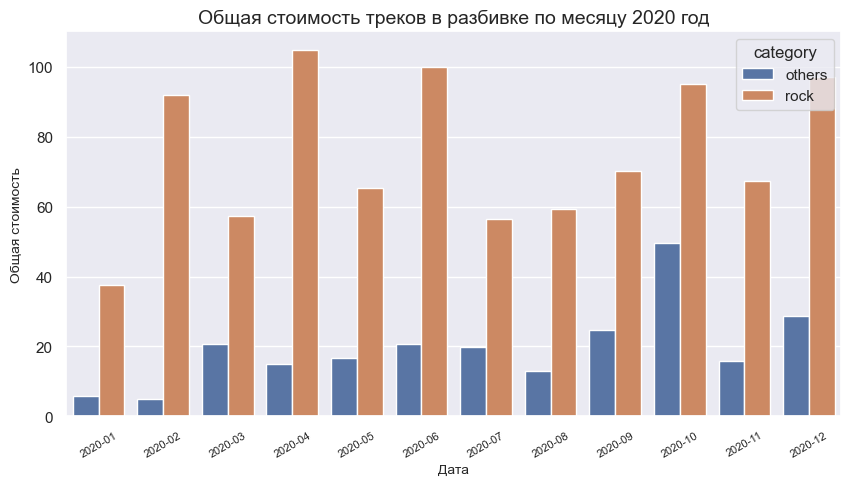

In [54]:
plt.figure(figsize=(10,5))
sns.barplot(x='invoice_date', y='track_sum', data = data_track_sum, hue='category')
plt.title('Общая стоимость треков в разбивке по месяцу 2020 год', fontsize=14)
plt.xticks(fontsize=8 ,rotation=30)
# Название оси X
plt.xlabel('Дата', fontsize=10)
# Название оси X
plt.ylabel('Общая стоимость', fontsize=10)
plt.show()

In [ ]:
# покупки Rock значительно превышают покупки Others на всём отрезке 2020 года

# доход от купленных треков по Rock преобладает в феврале, апреле, июне, октябре и декабре
# доход от купленных треков по Others - самый высокий показатель в октябре, спад в январе, феврале 